# CUPED

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from collections import defaultdict

### Создаем синтетический эксперимент
df_control - датафрейм Контроля  + ковариата (типа данных за прошлый период)

df_pilot - датафрейм Теста + ковариата.

df_theta  - их просто объединили.

In [215]:
def generate_data(sample_size, corr, mean=2000, sigma=300):
    """Генерируем коррелированные данные исходной метрики и ковариаты.
    
    sample_size - размер выборки
    corr - корреляция исходной метрики с ковариатой
    mean - среднее значение исходной метрики
    sigma - стандартное отклонение исходной метрики

    return - pd.DataFrame со столбцами ['metric', 'covariate'],
        'metric' - значения исходной метрики,
        'covariate' - значения ковариаты.
    """
    means = np.array([mean, mean])
    cov = sigma ** 2 * np.array([[1, corr], [corr, 1]])
    data = np.random.multivariate_normal(means, cov, sample_size).astype(int)
    df = pd.DataFrame({'metric': data[:, 0], 'covariate': data[:, 1]})
    return df

In [216]:
sample_size = 1000      # размер групп
corr = 0.7              # корреляция ковариаты с целевой метрикой
effect = 20             # размер эффекта

df_control = generate_data(sample_size, corr)
df_pilot = generate_data(sample_size, corr)
df_pilot['metric'] += effect
df_theta = pd.concat([df_control, df_pilot])

#### Cчитаем p_value без применения CUPED

In [217]:
 _, pvalue = stats.ttest_ind(df_control.metric, df_pilot.metric)
pvalue

0.11549979476965265

### Создаем новую метрику 
находим зету
вычитаетм из метрики Контроля и Теста произведение зеты и ковариаты

In [218]:
def calculate_theta(metrics, covariates):
    """Вычисляем Theta.

    metrics - значения исходной метрики
    covariates - значения ковариаты

    return - theta.
    """
    covariance = np.cov(covariates, metrics)[0, 1]
    variance = covariates.var()
    theta = covariance / variance
    return theta

theta = calculate_theta(df_theta['metric'], df_theta['covariate'])
metric_cuped_control = df_control['metric'] - theta * df_control['covariate']
metric_cuped_pilot = df_pilot['metric'] - theta * df_pilot['covariate']

### Проверяем результат  - считаем p_value c CUPED


In [219]:
def check_cuped(df_control, df_pilot, df_theta):
    """Проверяет гипотезу о равенстве средних с использованием CUPED.
    
    df_control и df_pilot - данные контрольной и экспериментальной групп
    df_theta - данные для оценки theta

    return - pvalue.
    """
    theta = calculate_theta(df_theta['metric'], df_theta['covariate'])
    metric_cuped_control = df_control['metric'] - theta * df_control['covariate']
    metric_cuped_pilot = df_pilot['metric'] - theta * df_pilot['covariate']
    _, pvalue = stats.ttest_ind(metric_cuped_control, metric_cuped_pilot)
    return pvalue

pvalue_cuped = check_cuped(df_control, df_pilot, df_theta)
pvalue_cuped

0.011775164856435252

Проведем симуляцию 10 000 экспериментах

In [221]:
def plot_pvalue_distribution(dict_pvalues):
    """Рисует графики распределения p-value."""
    X = np.linspace(0, 1, 1000)
    for key, pvalues in dict_pvalues.items():
        Y = [np.mean(pvalues < x) for x in X]
        plt.plot(X, Y, label=key)
    plt.plot([0, 1], [0, 1], '--k', alpha=0.8)
    plt.title('Оценка распределения p-value', size=16)
    plt.xlabel('p-value', size=12)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

In [230]:
def check_ttest(df_control, df_pilot):
    """Проверяет гипотезу о равенстве средних с помощью t-test.

    return - pvalue.
    """
    values_control = df_control['metric'].values
    values_pilot = df_pilot['metric'].values
    _, pvalue = stats.ttest_ind(values_control, values_pilot)
    return pvalue

In [231]:
sample_size = 1000
corr = 0.7
effect = 20
dict_pvalues = defaultdict(list)

for _ in range(10000):
    df_control = generate_data(sample_size, corr)
    df_pilot = generate_data(sample_size, corr)
    df_theta = pd.concat([df_control, df_pilot])
    dict_pvalues['cuped A/A'].append(check_cuped(df_control, df_pilot, df_theta))
    df_pilot['metric'] += effect
    df_theta = pd.concat([df_control, df_pilot])
    dict_pvalues['cuped A/B'].append(check_cuped(df_control, df_pilot, df_theta))
    dict_pvalues['ttest A/B'].append(check_ttest(df_control, df_pilot))

In [232]:
dict_pvalues

defaultdict(list,
            {'cuped A/A': [0.02648268299290311,
              0.45554766909984656,
              0.24430018856403324,
              0.554465731413603,
              0.020124850909740456,
              0.47147828728633157,
              0.24055893025406996,
              0.0826883948694206,
              0.7110508457227904,
              0.3416908648296034,
              0.18380971781904343,
              0.9731898902449514,
              0.8559695650433102,
              0.2949517668616358,
              0.9321457175260823,
              0.8962440010177903,
              0.6956576815122979,
              0.2825474163198599,
              0.8385758907023809,
              0.4171804178399863,
              0.8066753553793972,
              0.18092281172313146,
              0.735233299639684,
              0.24534208413226918,
              0.8158878411785819,
              0.8892785828298018,
              0.15424753451400924,
              0.9918422870320742,
        

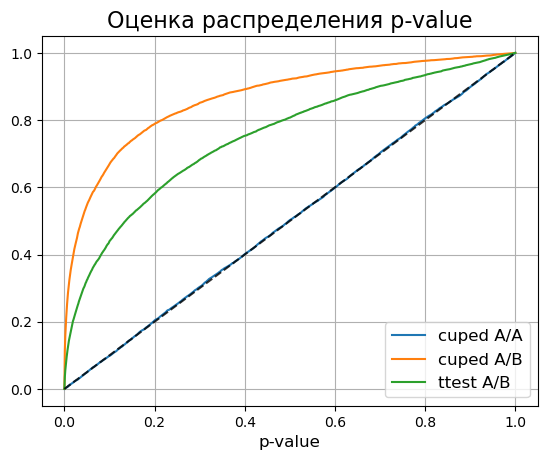

In [251]:
plot_pvalue_distribution(dict_pvalues)

In [244]:
d['f'] =[2]

In [249]:
d['f'].append(7)

In [250]:
d

{'f': [2, 3, 4, 7]}